In [1]:
import sys
import os
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from math import sqrt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

2023-10-04 22:32:30.892868: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### I) Descriptive statistics

In [2]:
#Q1-I-1
#Reading the input file 'diabetes.csv'
df = pd.read_csv('diabetes.csv')

#Check the number of records and number of columns in the input data file
print('The total number of rows/records are: ', df.shape[0])
print('The total number of columns/attributes are: ', df.shape[1])

The total number of rows/records are:  788
The total number of columns/attributes are:  9


In [3]:
#Print the first few records in the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1


In [4]:
#Q1-I-2
#Calculating the min, max, mean and std of the column age
Age_column = df['Age']
Age_stats = Age_column.describe()
print(Age_stats)
print("\n")

Age_mode = Age_column.mode().values[0]
print(f"Mode of the Age column: {Age_mode}")


count    788.000000
mean      33.215736
std       11.819875
min       12.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64


Mode of the Age column: 22


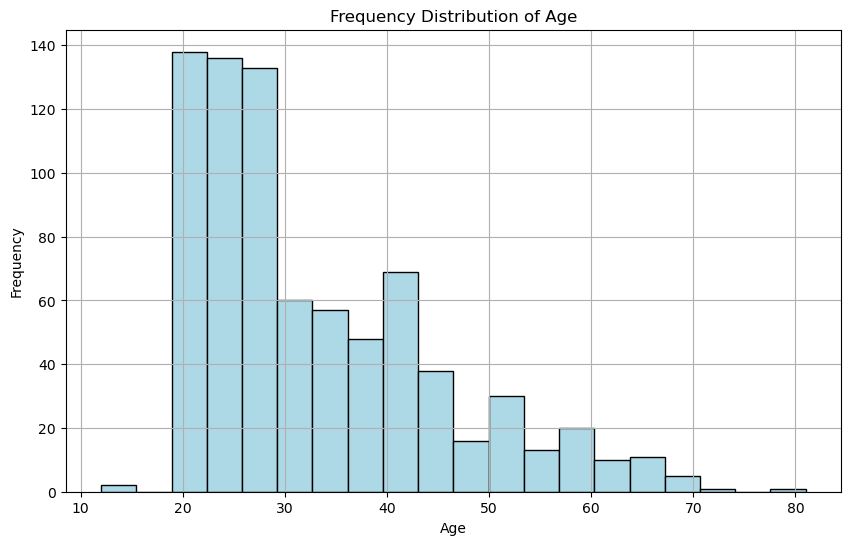

In [5]:
#Q1-I-4
Age_column = df['Age']

# Use value_counts() to calculate the frequency distribution
Age_counts = Age_column.value_counts().sort_index()

# Create a histogram to visualize the frequency distribution
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.hist(Age_column, bins=20, edgecolor='k', color = 'lightblue')  # Adjust the number of bins as desired
plt.title('Frequency Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Analysis of Age Distribution**

Based on the provided data, it is evident that the distribution of ages exhibits a multi-modal pattern. 

- **Multi-Modal Distribution:** In statistics, a multi-modal distribution refers to a distribution with multiple peaks or modes, where certain values or value ranges occur with notably high frequencies.

- **Distinct Modes:** In this dataset, we observe several distinct modes in the frequency of ages. Specifically, ages such as 22, 21, 25, 24, and others are associated with relatively high frequencies, indicating the presence of multiple modes within the data.

- **Clustered Ages:** This suggests that the ages in the dataset are not uniformly distributed but rather exhibit distinct clusters or modes with varying frequencies.

This information helps us understand that there are different age groups with varying levels of representation in the dataset, creating a multi-modal distribution.


In [6]:
#Q1-I-5
#calculating the Q1 and Q3 for the column age
Age_column = df['Age']

Q1 = Age_column.quantile(.25)
Q3 = Age_column.quantile(.75)

print("Q1: ", Q1)
print("Q3: ", Q3)

#Calculating the IQR
IQR = Q3 - Q1
print("IQR: ", IQR)

Q1:  24.0
Q3:  41.0
IQR:  17.0


In [7]:
#Q1-I-6
# Calculate the five-number summary
minimum = print('Min: ', df['Age'].min())
Q1 = print("Q1: ", df['Age'].quantile(0.25))
median = print("Median: ",df['Age'].median())
Q3 = print("Q3: ", df['Age'].quantile(0.75))
maximum = print("Max: ",df['Age'].max())

Min:  12
Q1:  24.0
Median:  29.0
Q3:  41.0
Max:  81


### II) Data visualisation

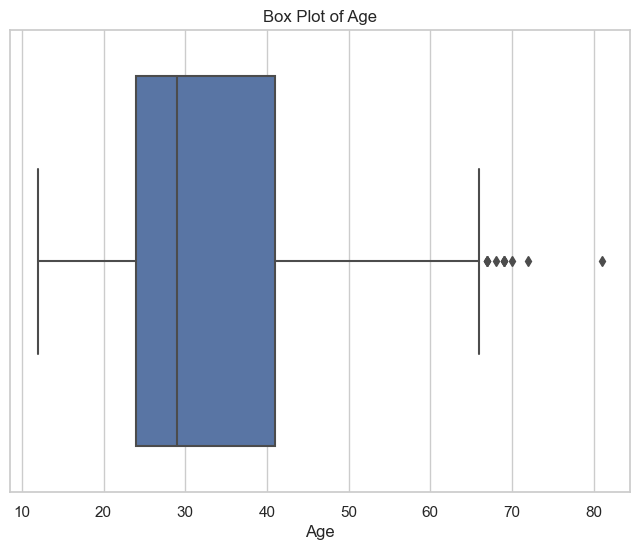

In [8]:
#Q1-II-1
#box plot for Age
sns.set(style="whitegrid")  # Set the style for the plot

# Create a box plot for the "Age" column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
# Add a title
plt.title("Box Plot of Age")

# Show the plot
plt.show()

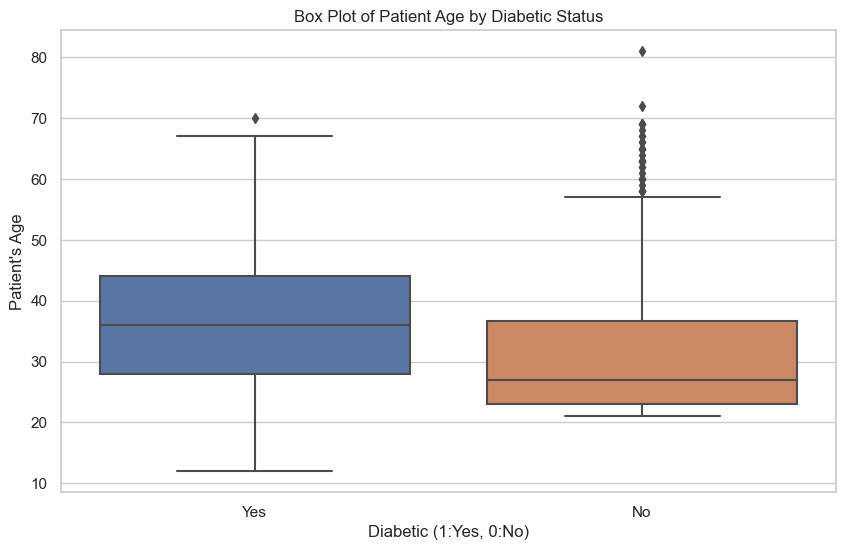

In [9]:
#Q1-II-2
# Create two separate dataframes for diabetic (1) and non-diabetic (0) patients
diabetic_df = df[df['Outcome'] == 1]
non_diabetic_df = df[df['Outcome'] == 0]

# Set up the figure and axes
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Outcome', y='Age', data=df, order=[1, 0])

# Set labels for x and y axes
ax.set(xlabel='Diabetic (1:Yes, 0:No)', ylabel="Patient's Age")

# Set the x-axis tick labels
ax.set_xticklabels(['Yes', 'No'])

# Set the title
plt.title('Box Plot of Patient Age by Diabetic Status')

# Show the plot
plt.show()


### Q1-II-3

**Diabetic Individuals**

The age group between 28 and 45 predominantly consists of people with diabetes. However, there are some outliers within this group. Notably, there are very few individuals over the age of 65 who have diabetes, indicating an unusual pattern.

**Non-Diabetic Individuals**

Conversely, the age group between 23 and 35 primarily includes individuals who do not have diabetes. Nevertheless, there are outliers within this group as well. Specifically, there are many individuals above the age of 58 who do not have diabetes, which is unexpected.

**Lack of Correlation**

These observations suggest that there is no straightforward correlation between age and diabetes status. While certain age ranges may be associated with higher or lower prevalence of diabetes, the presence of outliers in both diabetic and non-diabetic groups demonstrates that age alone is not a strong predictor of diabetes. Other factors may contribute to the development or absence of diabetes in these age groups.






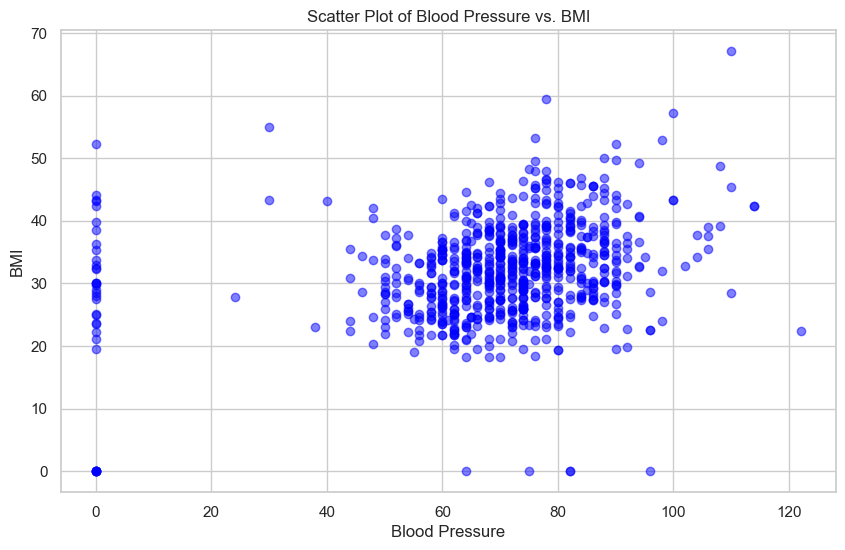

In [10]:
#Q1-II-4
# Scatter plot of Blood Pressure vs. BMI
plt.figure(figsize=(10, 6))
plt.scatter(df['BloodPressure'], df['BMI'], alpha=0.5, color = 'blue')
plt.xlabel("Blood Pressure")
plt.ylabel("BMI")
plt.title("Scatter Plot of Blood Pressure vs. BMI")
plt.grid(True)

# Show the plot
plt.show()


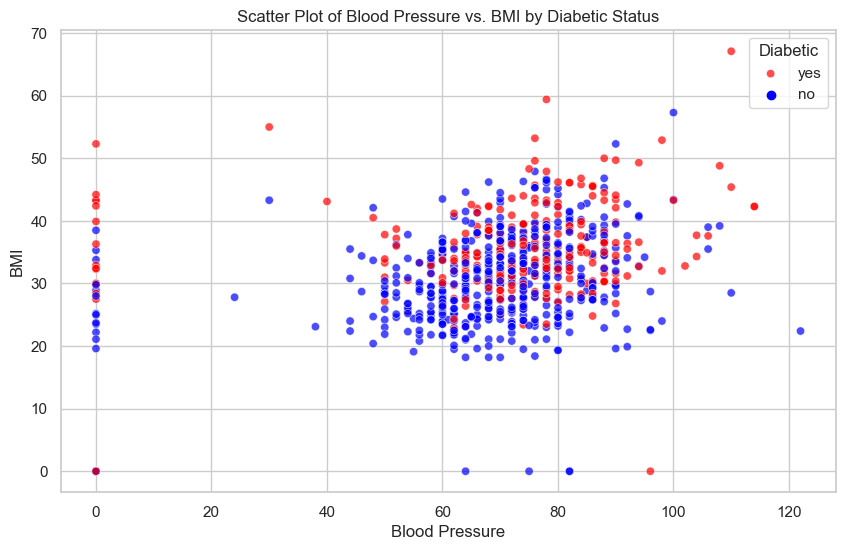

In [11]:
#Q1-II-5

# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot with different colors for diabetic status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BloodPressure', y='BMI', data=df, hue='Outcome', palette={1: 'red', 0: 'blue'}, alpha=0.7)

# Add labels to the axes
plt.xlabel("Blood Pressure")
plt.ylabel("BMI")

# Add a legend with labels 'diabetic: yes' and 'diabetic: no'
plt.legend(title='Diabetic', labels=['yes', 'no'])

# Set the title
plt.title("Scatter Plot of Blood Pressure vs. BMI by Diabetic Status")

# Show the plot
plt.show()


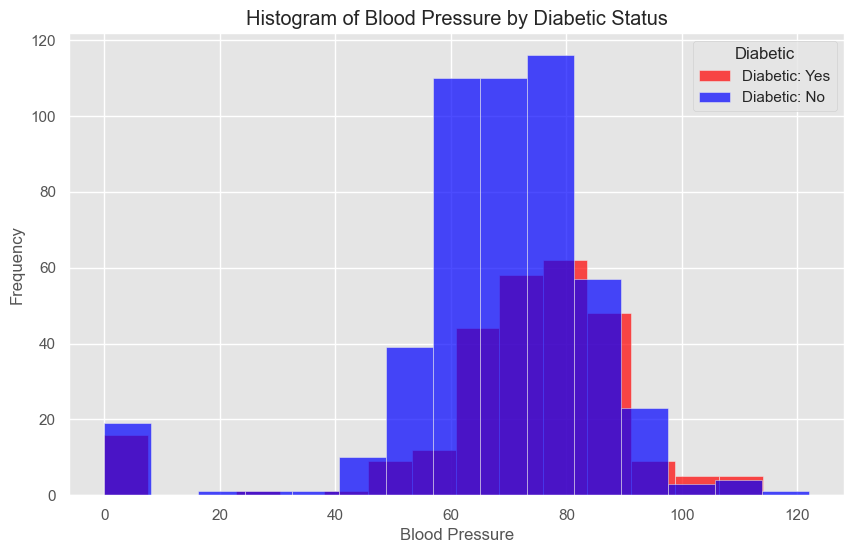

In [12]:
#Q1-II-6

# Set the style for the plot
plt.style.use('ggplot')

# Create a histogram of 'BloodPressure' values
plt.figure(figsize=(10, 6))
plt.hist(df[df['Outcome'] == 1]['BloodPressure'], bins=15, color='red', alpha=0.7, label='Diabetic: Yes')
plt.hist(df[df['Outcome'] == 0]['BloodPressure'], bins=15, color='blue', alpha=0.7, label='Diabetic: No')

# Add labels to the axes
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")

# Add a legend
plt.legend(title='Diabetic')

# Set the title
plt.title("Histogram of Blood Pressure by Diabetic Status")

# Show the plot
plt.show()


**Diabetes and Blood Pressure vs. BMI**

In this study, we see a group of data points with red and blue dots. This shows that people with and without diabetes can have different blood pressure and BMI in this range.

**Wide Range of Values**
We can see that there's a wide range of blood pressure and BMI values for both diabetic and non-diabetic people. Notably, some patterns appear, especially when looking at BMI values above 30 – there's a shift from blue dots to red dots.




### III) Data Filtering 

In [13]:
#Q1-III-1
# Select patients with Insulin > 400
selected_patients = df[df['Insulin'] > 400]

# Count diabetic and non-diabetic patients among the selected ones
diabetic_count = selected_patients[selected_patients['Outcome'] == 1]['Outcome'].count()
non_diabetic_count = selected_patients[selected_patients['Outcome'] == 0]['Outcome'].count()

print(f"Total selected patients: {len(selected_patients)}")
print(f"Diabetic patients among selected: {diabetic_count}")
print(f"Non-diabetic patients among selected: {non_diabetic_count}")


Total selected patients: 20
Diabetic patients among selected: 12
Non-diabetic patients among selected: 8


In [14]:
#Q1-III-2
# Select patients with Insulin > 400 and Glucose > 175
selected_patients = df[(df['Insulin'] > 400) & (df['Glucose'] > 175)]

# Count diabetic and non-diabetic patients among the selected ones
diabetic_count = selected_patients[selected_patients['Outcome'] == 1]['Outcome'].count()
non_diabetic_count = selected_patients[selected_patients["Outcome"] == 0]['Outcome'].count()

print(f"Total selectef patients: {len(selected_patients)}")
print(f"Diabetic patients amount selected: {diabetic_count}")
print(f"Non Diabetic patients amoung selected: {non_diabetic_count}")


Total selectef patients: 6
Diabetic patients amount selected: 5
Non Diabetic patients amoung selected: 1


In [15]:
#Q1-III-3
# Filter the DataFrame to select patients with more than 5 pregnancies and older than 45
selected_patients = df[(df['Pregnancies'] > 5) & (df['Age'] > 45)]

# Calculate the average glucose level for the selected patients
average_glucose = selected_patients['Glucose'].mean()

print(f"Average Glucose Level for Patients with > 5 Pregnancies and Age > 45: {average_glucose:.2f}")

Average Glucose Level for Patients with > 5 Pregnancies and Age > 45: 135.37


In [16]:
#Q1-III-4
#Counting the distinct values in the pregnancy column
print('Distinct values in Pregnancies column:', df['Pregnancies'].nunique())

Distinct values in Pregnancies column: 17


In [17]:
#Q1-III-5
# Group the data by 'Pregnancies' and calculate the percentage of diabetic and non-diabetic individuals for each value
print(df.groupby('Pregnancies')['Outcome'].value_counts(normalize = True).unstack().fillna(0))

Outcome             0         1
Pregnancies                    
0            0.660714  0.339286
1            0.773050  0.226950
2            0.824074  0.175926
3            0.644737  0.355263
4            0.666667  0.333333
5            0.637931  0.362069
6            0.680000  0.320000
7            0.434783  0.565217
8            0.450000  0.550000
9            0.344828  0.655172
10           0.583333  0.416667
11           0.363636  0.636364
12           0.555556  0.444444
13           0.454545  0.545455
14           0.000000  1.000000
15           0.000000  1.000000
17           0.000000  1.000000


### Question 2: Data Cleaning

**Duplicated Removal**

In [18]:
#Q2-I-1
#Identify any duplicated records by printing “True” if the row is duplicated and “False” otherwise.
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
783     True
784     True
785     True
786     True
787     True
Length: 788, dtype: bool


In [19]:
#Q2-I-2
print(df.drop_duplicates(inplace = True))
print("\n")

print("All the duplicates have been removed","\n\n", df.duplicated())

None


All the duplicates have been removed 

 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool


In [20]:
#Q2-I-3
#dimension of the df
df.shape

(768, 9)

In [21]:
df.to_csv('diabetes_cleaned.csv', index = False)

In [22]:
cleaned_df = pd.read_csv('diabetes_cleaned.csv')

### Q2-I-4
**How many duplicated rows were there (before removing the duplicates?**

Number of duplicated rows before removal: **20**


**Missing Values**

In [23]:
#Q2-II-1
#Count the missing values in the Blood Pressure column
print('Blood Pressure has', cleaned_df['BloodPressure'].isna().sum(), 'missing values')

Blood Pressure has 23 missing values


In [24]:
#Q2-II-2
#removing the missing values from Blood Pressure
cleaned_df.dropna(subset = ['BloodPressure'], inplace = True)

In [25]:
#Q2-II-3
#Count the missing values in the Blood Pressure column
print('Blood Pressure has', cleaned_df['BloodPressure'].isna().sum(), 'missing values')

Blood Pressure has 0 missing values


In [26]:
#Q2-II-4
Columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
           'DiabetesPedigreeFunction', 'Age']

new_df = cleaned_df[Columns].copy()

In [27]:
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35,0,33.6,0.627,50
1,1,85,66.0,29,0,26.6,0.351,31
2,8,183,64.0,0,0,23.3,0.672,32
3,1,89,66.0,23,94,28.1,0.167,21
4,0,137,40.0,35,168,43.1,2.288,15


In [28]:
#Q2-II-5
# Define the feature columns (X) and the target variable (y)
X = cleaned_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Split the data into 90% training and 10% test
X_train, X_test = train_test_split(X, test_size=0.10, random_state=42)

In [29]:
#Makingn a copy of X test
X_test_evaluation = X_test.copy()

In [30]:
#Setting Glucose to None
X_test['Glucose'] = None

In [31]:
X_test_1 = X_test.copy()
X_test_2 = X_test.copy()
X_test_1['Glucose'] = None
X_test_2['Glucose'] = None

In [32]:
# Q2-II-6
mean_glucose = X_train['Glucose'].mean()
X_test_1['Glucose'].fillna(mean_glucose, inplace = True)
rmse = sqrt(mean_squared_error(X_test_1['Glucose'], X_test_evaluation['Glucose']))
print(f"Root Mean Squared Error (RMSE) for imputed Glucose Values: {rmse}")

Root Mean Squared Error (RMSE) for imputed Glucose Values: 34.08851888719681


In [33]:
# Q2-II-7
median_glucose = X_train['Glucose'].median()
X_test_2['Glucose'].fillna(median_glucose, inplace = True)
rmse = sqrt(mean_squared_error(X_test_2['Glucose'], X_test_evaluation['Glucose']))
print(f"Root Mean Squared Error (RMSE) for imputed Glucose Values: {rmse}")

Root Mean Squared Error (RMSE) for imputed Glucose Values: 34.43486605172147


In [34]:
 #Q2-II-8
# Create a SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the training data to learn the most frequent value of 'Glucose'
imputer.fit(X_train[['Glucose']])

# Create a copy of the testing set to impute values into
X_test_imputed_frequentStrategy = X_test.copy()

# Use the learned most frequent value to fill missing values in 'Glucose' column of the testing set
X_test_imputed_frequentStrategy['Glucose'].fillna(imputer.statistics_[0], inplace=True)

# Calculate the RMSE for the imputed 'Glucose' values in X_test_imputed_frequentStrategy
rmse = np.sqrt(mean_squared_error(X_test_evaluation['Glucose'], X_test_imputed_frequentStrategy['Glucose']))

# Print the RMSE as a measure of imputation accuracy
print(f"Root Mean Squared Error (RMSE) for imputed Glucose values: {rmse}")


Root Mean Squared Error (RMSE) for imputed Glucose values: 41.11252850409471


In [35]:
# Q2-II-9
imputer = KNNImputer(n_neighbors=3)

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the testing set (X_test) using the learned imputer
X_test_imputed = imputer.transform(X_test)

# Calculate the RMSE for the imputed values in X_test_imputed compared to X_test_evaluation
rmse = sqrt(mean_squared_error(X_test_evaluation, X_test_imputed))
print(f"Root Mean Squared Error (RMSE) for imputed values: {rmse}")

Root Mean Squared Error (RMSE) for imputed values: 10.955803468008616


In [36]:
##Q2-II-10

### Imputation Method Comparison

- **KNNImputer with k=3:**
  - RMSE: 12.052111432871286

- **SimpleImputer with 'most_frequent' strategy for 'Glucose':**
  - RMSE: 34.08851888719681

**RMSE (Root Mean Squared Error) Comparison:**
- RMSE measures the accuracy of imputed values, with lower values indicating better accuracy.

**Conclusion:**
Based on the RMSE values, the KNNImputer with k=3 outperforms the SimpleImputer with the 'most_frequent' strategy for the 'Glucose' column. It achieves a significantly lower RMSE, suggesting more accurate imputations in this specific case.

